#Sorting Hat

In [0]:
def features_creator(boxplots):

  def boxplot_to_normal(Q1, Q2, Q3):
    sd = (Q3-Q1)*(3/4)
    mean = (Q1+(Q3-Q1)/2) #/(Q3-Q1)
    alpha = ((Q3-Q2)/(Q2-Q1)) #/(Q3-Q1)
    return mean, sd, alpha
  
  features = boxplots
  
  for i in range(len(boxplots)):
    mean, sd, alpha = boxplot_to_normal(boxplots[i][0], boxplots[i][1], boxplots[i][2]) #Q1, Q2, Q3
    features[i][0] = mean
    features[i][1] = sd
    features[i][2] = alpha
  return features

#Boxplots con reference value at .4, variation for .1 range are 206 pixels
boxplots = [ #Q1, Q2, Q3 in pixels
     [-64, 21, 85], [-167, -83, -19], [-311, -206, -60], [-144, 22, 85], [-211, -186, -81], #Griffindor: O, C, E, A, N
     [-41, 42, 105], [-147, -83, -19], [-373, -228, -101], [-106, 22, 85], [-333, -206, -81], #Hufflepuff: O, C, E, A, N
     [-64, 21, 85], [-147, -83, -19], [-351, -228, -123], [-44, 41, 126], [-333, -227, -101], #Ravenclow: O, C, E, A, N
     [-188, -83, 23], [-188, -123, -60], [-373, -228, -141], [-64, 21, 85], [-352, -227, -101], #Slytherin: O, C, E, A, N
    ]

#conversion pixels to real numbers on a scale [0, .5]
for i in range(len(boxplots)):
  for a in range(len(boxplots[i])):
    boxplots[i][a] = (4+(boxplots[i][a]/206))/10

boxplots_copy = [x[:] for x in boxplots] #duplicate list
features = features_creator(boxplots) #conversion from boxplots (with Q1, Q2, Q3) to features (means, sd, alpha)
features

[[0.40509708737864075, 0.05424757281553394, 0.7529411764705877],
 [0.3548543689320388, 0.05388349514563105, 0.7619047619047631],
 [0.30995145631067966, 0.09138349514563109, 1.390476190476192],
 [0.38567961165048537, 0.08337378640776698, 0.37951807228915474],
 [0.32912621359223304, 0.04733009708737862, 4.200000000000024],
 [0.4155339805825242, 0.053155339805825194, 0.7590361445783095],
 [0.35970873786407764, 0.0466019417475728, 1.0000000000000018],
 [0.28495145631067964, 0.09902912621359225, 0.8758620689655175],
 [0.3949029126213592, 0.0695388349514563, 0.49218749999999745],
 [0.29951456310679614, 0.091747572815534, 0.9842519685039376],
 [0.40509708737864075, 0.05424757281553394, 0.7529411764705877],
 [0.35970873786407764, 0.0466019417475728, 1.0000000000000018],
 [0.28495145631067964, 0.08300970873786405, 0.8536585365853657],
 [0.41990291262135926, 0.06189320388349516, 1.0000000000000013],
 [0.2946601941747573, 0.08446601941747575, 1.1886792452830182],
 [0.3599514563106796, 0.076820388

In [0]:
#we create the distributions based the means and standard deviations
import pandas as pd
import numpy as np
from scipy.stats import skewnorm
def algo(features, classes, size):

  def calc(x, sd, mean):
    return (x*sd)+mean

  all_norm = list()

  for values in features:
    k = skewnorm.rvs(values[2], size=size)
    k = calc(k, values[1], values[0])
    all_norm.append(k)
    #all_norm.append(np.random.normal(values[0], values[1], size)) #A, B, C, D, E, F, G, H...
  all_norm_copy = all_norm.copy() #facciamo una copia della lista, quando la grafiamo con la normal distribution allora è piena: grafando un df si ottengono linee

  feature_n = len(features) #8
  classes_n = len(classes) #2
  column_n = feature_n/classes_n #4
  X = pd.DataFrame()

  for i in range(len(all_norm)):
    all_norm[i] = pd.DataFrame(all_norm[i])
  
  col = pd.DataFrame()
  for c in range(int(classes_n)): #per ogni colonna
    beginning = int(c*column_n) #se in caso ci saranno dei problemi sono qui
    end = int(beginning+column_n)
    col = pd.concat(all_norm[beginning:end], axis=1)
    X = pd.concat([X, col], axis=0)

  y = pd.DataFrame([0]*(size*int(classes_n)))
  for m in range(classes_n):
    beginning = int(m*size)
    end = int((beginning+size)*int(classes_n))
    y[beginning:end] = classes[m]

  return X, y, all_norm_copy

names = [
     ['Openness, Griffindor'], ['Conscientiousness, Griffindor'], ['Extroversion, Griffindor'], ['Agreebleness, Griffindor'], ['Neuroticism, Griffindor'], #Griffindor: O, C, E, A, N
     ['Openness, Hufflepuff'], ['Conscientiousness, Hufflepuff'], ['Extroversion, Hufflepuff'], ['Agreebleness, Hufflepuff'], ['Neuroticism, Hufflepuff'], #Hufflepuff: O, C, E, A, N
     ['Openness, Ravenclow'], ['Conscientiousness, Ravenclow'], ['Extroversion, Ravenclow'], ['Agreebleness, Ravenclow'], ['Neuroticism, Ravenclow'], #Ravenclow: O, C, E, A, N
     ['Openness, Slytherin'], ['Conscientiousness, Slytherin'], ['Extroversion, Slytherin'], ['Agreebleness, Slytherin'], ['Neuroticism, Slytherin'], #Slytherin: O, C, E, A, N
    ] 

#se invece di utilizzare features vogliamo inputtare i dati manualmente, anche questo va bene
#features = [ #mean, sd, alpha
#     [41.03, 6.32, 0.3], [35.58, 07.13, 0], [31.02, 12.20, 0], [40.51, 07.35, 0], [30.66, 11.17, 0], #Griffindor: O, C, E, A, N
#     [39.41, 9.33, 0], [36.76, 06.17, 0], [27.79, 13.16, 0], [41.61, 07.27, 0], [30.00, 12.13, 0], #Hufflepuff: O, C, E, A, N
#     [41.98, 8.23, 0], [36.76, 06.17, 0], [28.52, 11.17, 0], [40.51, 07.35, 0], [29.55, 11.17, 0], #Ravenclow: O, C, E, A, N
#     [40.51, 7.35, 0], [34.66, 06.20, 0], [27.42, 11.17, 0], [36.17, 10.22, 0], [28.97, 12.20, 0], #Slytherin: O, C, E, A, N   #C: [39.70, 6.10]
#    ]

labels = ['Griffindor', 'Hufflepuff', 'Ravenclow', 'Slytherin']
columns = ['Openness', 'Conscientiousness', 'Extroversion', 'Agreeableness', 'Neuroticism']
X, y, all_norm_copy = algo(features, labels, 1000) #features devono essere sotto forma di sd, mean, alpha

In [0]:
'''
for k in range(len(features)):
  features[k][1] *= 0.1

features = [
     [10, 1, 0], [11, 1, 0], [12, 1, 0], [13, 1, 0], [14, 1, 0], #Griffindor: O, C, E, A, N
     [20, 1, 0], [21, 1, 0], [22, 1, 0], [23, 1, 0], [24, 1, 0], #Hufflepuff: O, C, E, A, N
     [30, 1, 0], [31, 1, 0], [32, 1, 0], [33, 1, 0], [34, 1, 0], #Ravenclow: O, C, E, A, N
     [40, 1, 0], [41, 1, 0], [42, 1, 0], [43, 1, 0], [44, 1, 0], #Slytherin: O, C, E, A, N
    ]
'''

In [0]:
#entire dataset
X.reset_index(drop=True, inplace=True)
X.columns = columns
y.reset_index(drop=True, inplace=True)
y.columns = ['House']
a = pd.concat([X, y], axis=1) #se non resettiamo gli index da errore
a.head()

,Openness,Conscientiousness,Extroversion,Agreeableness,Neuroticism,House
0,0.463716,0.384771,0.428078,0.382935,0.345870,Griffindor
1,0.479612,0.341956,0.318241,0.442203,0.358316,Griffindor
2,0.392385,0.400751,0.425911,0.320604,0.364453,Griffindor
3,0.440043,0.450323,0.208607,0.303252,0.353669,Griffindor
4,0.470595,0.348101,0.335185,0.324673,0.369610,Griffindor


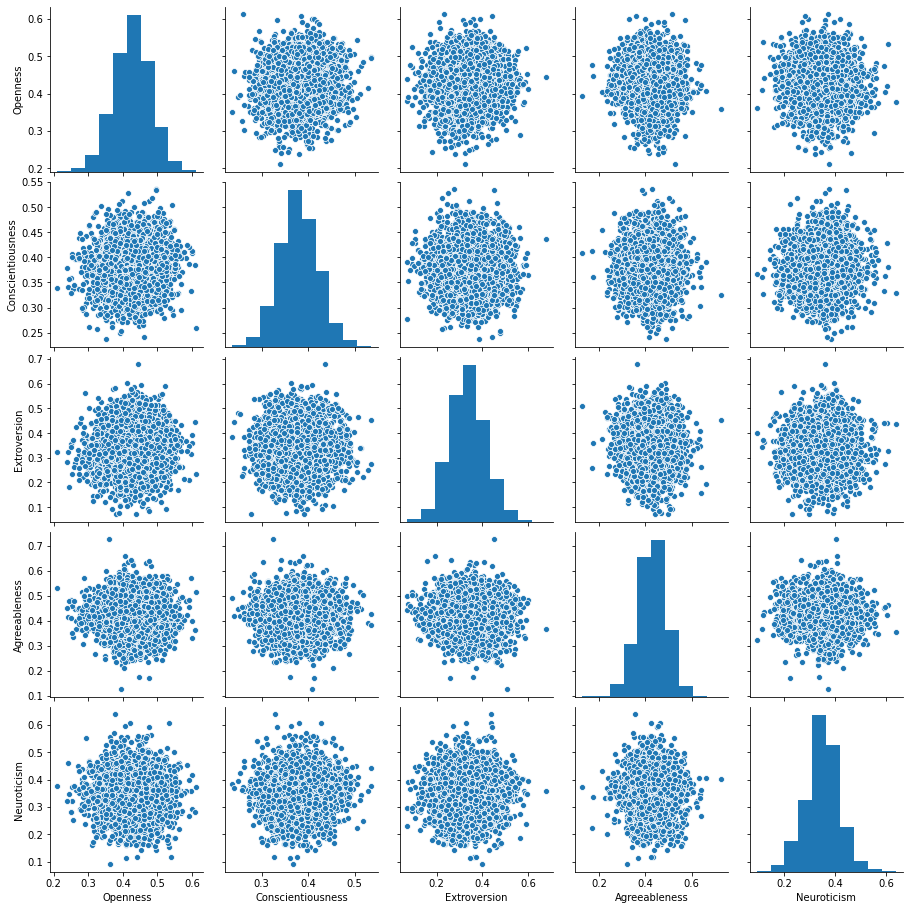

In [0]:
#correlogram
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
 
# Basic correlogram
sns.pairplot(a)
plt.show()

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

g = list()
for region, df_region in a.groupby('House'):
  g.append(df_region)
#otteniamo 3 differenti Dataframe in a
g

b = list()

for c in a.columns[:-1]:
  for l in range(len(g)):
    b.append(pd.DataFrame(g[l][c]))
#b contiente tutte le 12 possibili colonne
b


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(a, hue="House", height=5)

In [0]:
#graphing the distributions individually
  #all_norm_copy is a list with all the distributions
import matplotlib.pyplot as plt

for distribution in range(len(features)):
  mean = features[distribution][0]
  sd = features[distribution][1]
  count, bins, ignored = plt.hist(all_norm_copy[distribution], 1000)
  #plt.plot(bins, 1/(sd * np.sqrt(2 * np.pi)) *np.exp( - (bins - mean)**2 / (2 * std**2) ),linewidth=2, color='r')
  plt.xlabel(names[distribution])
  #plt.ylabel('y')

  plt.show()

In [0]:
#graphing boxplots individually
  #all_norm_copy is a list with all the distributions
for distribution in range(len(features)):
  all_norm_copy[distribution] = pd.DataFrame(all_norm_copy[distribution])
  all_norm_copy[distribution].plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8d73477f0>,
      dtype=object)

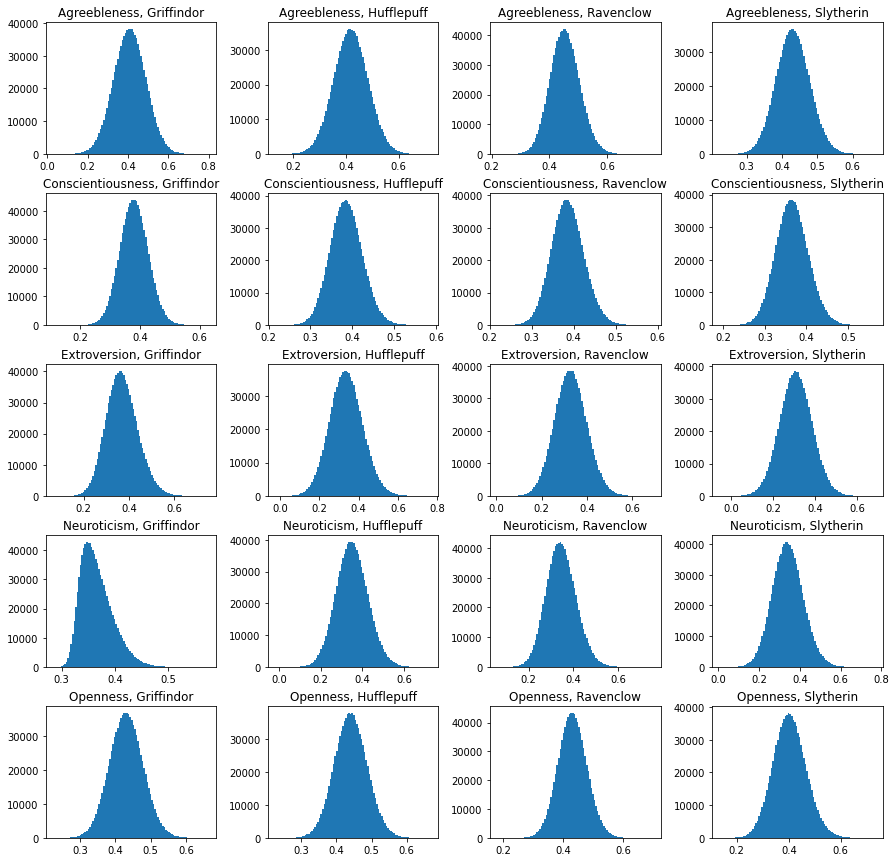

In [0]:
#graphing all distributions

#converting the list into a unique DataFrame
distributions_combined = pd.DataFrame()
for k in range(len(all_norm_copy)):
  all_norm_copy[k] = pd.DataFrame(all_norm_copy[k])
  all_norm_copy[k].columns = names[k]
  distributions_combined = pd.concat([distributions_combined, all_norm_copy[k]], axis=1)

#distributions_combined = distributions_combined.values
distributions_combined.hist(figsize=(15, 15), grid=False, bins=100)

In [0]:
#con questo codice vediamo la differenza dei quartiles originali e quelli delle distribuzioni stimate
#oxplots_copy[distribution] = pd.DataFrame(boxplots_copy[distribution])
#boxplots_copy[distribution].describe()
#all_norm_copy[distribution].describe()

In [0]:
#correlation matrix of the entire Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

import pandas as np

corr = distributions_combined.corr()
fig, ax = plt.subplots(figsize=(15,15)) 

ax = sns.heatmap(
    corr,
    #mask=mask,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(11, 256, n=200),
    square=True,
    ax=ax,
    annot=True
)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3600000, 5) (400000, 5) (3600000, 1) (400000, 1)


In [0]:
#scaling of my personality traits
#michelangiolo = [85, 111, 78, 47, 74] #max=120
#laura = [104, 100, 88, 100, 60] #max=120
#juan = [87.5, 81, 87.5, 71, 15] #max=100

values = [85, 111, 78, 47, 74]
def calc(x, max):
  return (x/max)*50

for m in range(len(values)):
  values[m] = calc(values[m], 120)
values

[35.41666666666667, 46.25, 32.5, 19.583333333333332, 30.833333333333336]

In [0]:
#Gaussian Naive Bayes
import numpy as np
from sklearn.naive_bayes import GaussianNB

#training the AI
clf = GaussianNB()
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

#predicting my result
print(clf.predict([values]))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4970125
['Slytherin']
